# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)
lat_save = []
lng_save = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_save.append(lat_lng[0])
        lng_save.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))
print(len(lat_save))
print(len(lng_save))


854
854
854


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame({"City":cities})
weather_df["Latitude"] = lat_save
weather_df["Longitute"] = lng_save
weather_df["Temperature (F)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness(%)"] = ""
weather_df["Wind Speed"] = ""

In [4]:
len(weather_df)


854

In [5]:
'''url = "http://api.openweathermap.org/data/2.5/weather?"

{'coord': {'lon': -117.83, 'lat': 33.69},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 54,
  'pressure': 1016,
  'humidity': 82,
  'temp_min': 50,
  'temp_max': 57.2},
 'visibility': 16093,
 'wind': {'speed': 1.59, 'deg': 296.5},
 'clouds': {'all': 1},
 'dt': 1553675124,
 'sys': {'type': 1,
  'id': 5876,
  'message': 0.009,
  'country': 'US',
  'sunrise': 1553694337,
  'sunset': 1553738855},
 'id': 5359777,
 'name': 'Irvine',
 'cod': 200}
 '''

'url = "http://api.openweathermap.org/data/2.5/weather?"\n\n{\'coord\': {\'lon\': -117.83, \'lat\': 33.69},\n \'weather\': [{\'id\': 800,\n   \'main\': \'Clear\',\n   \'description\': \'clear sky\',\n   \'icon\': \'01n\'}],\n \'base\': \'stations\',\n \'main\': {\'temp\': 54,\n  \'pressure\': 1016,\n  \'humidity\': 82,\n  \'temp_min\': 50,\n  \'temp_max\': 57.2},\n \'visibility\': 16093,\n \'wind\': {\'speed\': 1.59, \'deg\': 296.5},\n \'clouds\': {\'all\': 1},\n \'dt\': 1553675124,\n \'sys\': {\'type\': 1,\n  \'id\': 5876,\n  \'message\': 0.009,\n  \'country\': \'US\',\n  \'sunrise\': 1553694337,\n  \'sunset\': 1553738855},\n \'id\': 5359777,\n \'name\': \'Irvine\',\n \'cod\': 200}\n '

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

print(f'Beginning Data Retrieval \n ........................')
for index,row in weather_df.iterrows():
    query_url = url + "appid=" + api_key + "&q=" + str(row['City']) + "&units=imperial"
    try:
        response = requests.get(query_url).json()
        weather_df.set_value(index, "Temperature (F)", int(response['main']['temp']))
        weather_df.set_value(index, "Humidity (%)", int(response['main']['humidity']))
        weather_df.set_value(index, "Cloudiness(%)", int(response['clouds']['all']))
        weather_df.set_value(index, "Wind Speed", int(response['wind']['speed']))

    except:
        print(f"No data for this city: {row['City']}")
weather_df.head()

   
    




    

Beginning Data Retrieval 
 ........................


C:\Users\huyt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\huyt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\huyt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\huyt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.in

No data for this city: nizhneyansk
No data for this city: saleaula
No data for this city: karauzyak
No data for this city: belushya guba
No data for this city: sentyabrskiy
No data for this city: barentsburg
No data for this city: tsihombe
No data for this city: taolanaro
No data for this city: illoqqortoormiut
No data for this city: mouzakion
No data for this city: mocambique
No data for this city: amderma
No data for this city: kulasi
No data for this city: acarau
No data for this city: rungata
No data for this city: warqla
No data for this city: tapaua
No data for this city: vaitupu
No data for this city: uk
No data for this city: jiddah
No data for this city: svetlyy
No data for this city: sidi qasim
No data for this city: korla
No data for this city: olafsvik
No data for this city: grand river south east
No data for this city: attawapiskat
No data for this city: sahrak
No data for this city: haibowan
No data for this city: aflu
No data for this city: poenarii-burchi
No data for th

,City,Latitude,Longitute,Temperature (F),Humidity (%),Cloudiness(%),Wind Speed
0,nova olimpia,-13.316980,-58.159841,73,95,88,2
1,hobart,-44.543764,149.207082,54,62,0,5
2,amurrio,42.870389,-3.064101,48,76,0,1
3,tshikapa,-6.451057,20.773843,85,72,8,2
4,chuy,-44.370821,-40.358666,60,90,0,10


In [7]:
len(weather_df)

854

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_df = weather_df[weather_df['Wind Speed'] !=""]
weather_df.to_csv("../Huys_weatherdata_output.csv")




In [21]:
len(weather_df)

771

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

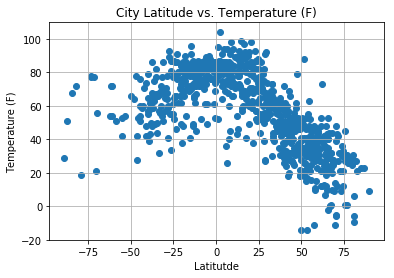

In [17]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], marker="o")


plt.title("City Latitude vs. Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("../Latitude_vs_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

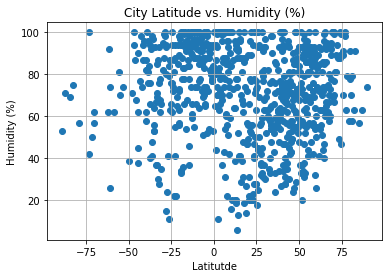

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], marker="o")


plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("../Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

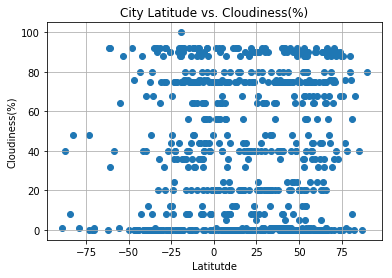

In [19]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness(%)"], marker="o")


plt.title("City Latitude vs. Cloudiness(%)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("../Latitude_vs_Clooudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

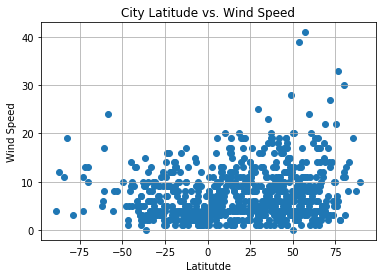

In [20]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")


plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("../Latitude_vs_Clooudiness.png")
plt.show()

# Observations

In [ ]:
'''
1) Temperature rises as it gets closers to the equator
2) Wind speed picks up south of the equator
3) There is little cloud coverage near the polers
'''